In [9]:
import pandas as pd
import numpy as np
import torch
import sys

sys.path.insert(0, '../../')
sys.path.insert(0, '../../src/')

from src.utils.script_utils import create_parser, create_data_
from scripts.softmargin_run_multi import add_arg_parser

In [10]:
seeds = [0, 1, 2]
type_graph = "TREE"

Ns = [0]*6
d = [4]*6#, 4, 4, 4, 4]
h = [6]*6#, 6, 6, 6, 6]
t_limit = 15 # Numbers of epoch of our epidemics spreading [0,1,...,T_limit-1]
lambda_ = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6] # probability of infection
mu = 1e-10 # probability of recovery
p_edge = 1
num_conf = [1]*3
steps = np.power(2.,-np.arange(5,19)) #steps of nn
steps = [f"{x:.8e}" for x in steps]
#nsims = [2000, 4000, 8000, 16000, 32000, 64000, 128000, 256000, 512000] #niter of soft_margin
device = "cpu"
dtype = "float"

p_source = -1
p_mc = -1
p_obs = -1

path_dir = "./data"
if path_dir == "not_setted":
    path_dir = type_graph

In [14]:
from epigen.epidemy_gen import epidemy_gen

list_contacts = {}
data_={}
for i_seed, seed in enumerate(seeds):
    print(f"\nSEED: {seed}")
    list_contacts[seed] = {}
    data_[seed] = {}
    for cl in range(len(lambda_)):
        temp = epidemy_gen(Ns[cl], d[cl], h[cl], t_limit,
                           type_graph = type_graph,
                           lambda_ = lambda_[cl],
                            mu = mu,
                            p_edge = p_edge,
                            seed=seed,
                            num_conf = num_conf[i_seed],
                                   lim_infected=1,
                           )
        Ns[cl] = int(max(temp["contacts"][:, 1]) + 1)
        list_contacts[seed][Ns[cl]] = temp["contacts"]
        data_[seed][Ns[cl]] = temp

data_.keys()


SEED: 0
nodes:1093, edges:1092
number of contacs: 32760
Num sources:  1
 # conf 1,mean infected: 2.0, mean recover: 0.0, max num infected: 2
0 (0.00%) epidemies refused

S:1091, I:2, R:0
nodes:1093, edges:1092
number of contacs: 32760
Num sources:  1
 # conf 1,mean infected: 2.0, mean recover: 0.0, max num infected: 2
0 (0.00%) epidemies refused

S:1091, I:2, R:0
nodes:1093, edges:1092
number of contacs: 32760
Num sources:  1
 # conf 1,mean infected: 2.0, mean recover: 0.0, max num infected: 2
0 (0.00%) epidemies refused

S:1091, I:2, R:0
nodes:1093, edges:1092
number of contacs: 32760
Num sources:  1
 # conf 1,mean infected: 5.0, mean recover: 0.0, max num infected: 5
0 (0.00%) epidemies refused

S:1088, I:5, R:0
nodes:1093, edges:1092
number of contacs: 32760
Num sources:  1
 # conf 1,mean infected: 11.0, mean recover: 0.0, max num infected: 11
0 (0.00%) epidemies refused

S:1082, I:11, R:0
nodes:1093, edges:1092
number of contacs: 32760
Num sources:  1
 # conf 1,mean infected: 376.

dict_keys([0, 1, 2])

# READ DATA

create name_files

In [15]:
name_files_nn = {}
#name_files_nn_s = {}

for i_seed, seed in enumerate(seeds):
    #print(f"\nSEED: {seed}")
    name_files_nn[seed] = {}
    for cl in range(len(Ns)):
        name_files_nn[seed][lambda_[cl]] = {}
        for step in steps:
            #str__ = "{0:0.1e}".format(step)
            #str__ = str__.replace(".0", "")
            #str__ = str__.replace("0", "")
            name_file_init = path_dir + "/" + step
            #print(step, name_file_init)
            name_file_temp = name_file_init + f"N_{Ns[cl]}_d_{d[cl]}_h_{h[cl]}_T_{t_limit}_lam_{lambda_[cl]}_mu_{mu}_p_edge_{p_edge}"
            name_file_temp += f"_s_{seed}"
            name_files_nn[seed][lambda_[cl]][step] = name_file_temp

'''for i_seed, seed in enumerate(seeds):
    #print(f"\nSEED: {seed}")
    name_files_nn_s[seed] = {}
    for cl in range(len(Ns)):
        name_files_nn_s[seed][Ns[cl]] = {}
        for step in steps:
            #str__ = "{0:0.1e}".format(step)
            #str__ = str__.replace(".0", "")
            #str__ = str__.replace("0", "")
            name_file_init = path_dir + "/" + str__.replace(".0", "")
            #print(step, name_file_init)
            name_file_temp = name_file_init + f"N_{Ns[cl]}_d_{d[cl]}_h_{h[cl]}_T_{t_limit}_lam_{lambda_[cl]}_mu_{mu}_p_edge_{p_edge}"
            name_file_temp += f"_s_{seed}"
            name_files_nn_s[seed][Ns[cl]][step] = name_file_temp
'''
name_files_sib = {}
for i_seed, seed in enumerate(seeds):
    #print(f"\nSEED: {seed}")
    name_files_sib[seed] = {}
    for cl in range(len(Ns)):
        name_files_sib[seed][lambda_[cl]] = {}
        name_file_init = path_dir + "/"
        #print(step, name_file_init)
        name_file_temp = name_file_init + f"N_{Ns[cl]}_d_{d[cl]}_h_{h[cl]}_T_{t_limit}_lam_{lambda_[cl]}_mu_{mu}_p_edge_{p_edge}"
        name_file_temp += f"_s_{seed}"
        name_files_sib[seed][lambda_[cl]] = name_file_temp
            #print(name_file_temp)
        

In [16]:
name_files_sib

{0: {0.1: './data/N_1093_d_4_h_6_T_15_lam_0.1_mu_1e-10_p_edge_1_s_0',
  0.2: './data/N_1093_d_4_h_6_T_15_lam_0.2_mu_1e-10_p_edge_1_s_0',
  0.3: './data/N_1093_d_4_h_6_T_15_lam_0.3_mu_1e-10_p_edge_1_s_0',
  0.4: './data/N_1093_d_4_h_6_T_15_lam_0.4_mu_1e-10_p_edge_1_s_0',
  0.5: './data/N_1093_d_4_h_6_T_15_lam_0.5_mu_1e-10_p_edge_1_s_0',
  0.6: './data/N_1093_d_4_h_6_T_15_lam_0.6_mu_1e-10_p_edge_1_s_0'},
 1: {0.1: './data/N_1093_d_4_h_6_T_15_lam_0.1_mu_1e-10_p_edge_1_s_1',
  0.2: './data/N_1093_d_4_h_6_T_15_lam_0.2_mu_1e-10_p_edge_1_s_1',
  0.3: './data/N_1093_d_4_h_6_T_15_lam_0.3_mu_1e-10_p_edge_1_s_1',
  0.4: './data/N_1093_d_4_h_6_T_15_lam_0.4_mu_1e-10_p_edge_1_s_1',
  0.5: './data/N_1093_d_4_h_6_T_15_lam_0.5_mu_1e-10_p_edge_1_s_1',
  0.6: './data/N_1093_d_4_h_6_T_15_lam_0.6_mu_1e-10_p_edge_1_s_1'},
 2: {0.1: './data/N_1093_d_4_h_6_T_15_lam_0.1_mu_1e-10_p_edge_1_s_2',
  0.2: './data/N_1093_d_4_h_6_T_15_lam_0.2_mu_1e-10_p_edge_1_s_2',
  0.3: './data/N_1093_d_4_h_6_T_15_lam_0.3_mu_1e-10

### READ FILES

In [17]:
#create dictorary containing data
ress = {}
for i_seed, seed in enumerate(seeds):
    print(f"\nSEED: {seed}")
    ress[seed] = {}
    for cl in range(len(Ns)):
        N_cl = Ns[cl]
        ress[seed][lambda_[cl]] = []
        for instance_num in range(num_conf[i_seed]):
            print(f" N: {N_cl} instance {instance_num}")
            ress[seed][lambda_[cl]].append({})



SEED: 0
 N: 1093 instance 0
 N: 1093 instance 0
 N: 1093 instance 0
 N: 1093 instance 0
 N: 1093 instance 0
 N: 1093 instance 0

SEED: 1
 N: 1093 instance 0
 N: 1093 instance 0
 N: 1093 instance 0
 N: 1093 instance 0
 N: 1093 instance 0
 N: 1093 instance 0

SEED: 2
 N: 1093 instance 0
 N: 1093 instance 0
 N: 1093 instance 0
 N: 1093 instance 0
 N: 1093 instance 0
 N: 1093 instance 0


In [18]:
for i_seed, seed in enumerate(seeds):
    print(f"\nSEED: {seed}\n")
    for cl in range(len(lambda_)):
        lambda_cl = lambda_[cl]
        for instance_num in range(num_conf[i_seed]):
            ress[seed][lambda_cl][instance_num]["regressive"] = {}
            print(f"Read lambda: {lambda_cl} instance {instance_num}")
            for step in steps:
                name_temp = name_files_nn[seed][lambda_cl][step] +"_" + str(instance_num)
                try:
                    ress[seed][lambda_cl][instance_num]["regressive"][step] = {}
                    ress[seed][lambda_cl][instance_num]["regressive"][step]["marginals"] = np.load(name_temp + "_margs.npz",
                                                                            "r+",
                                                                           allow_pickle=True,
                                                                           fix_imports=True)["marginals"]
                    ress[seed][lambda_cl][instance_num]["regressive"][step]["run"] = pd.read_csv(name_temp + ".gz")
                    beta_end = ress[seed][lambda_cl][instance_num]["regressive"][step]["run"]["beta"].iloc[-1]
                    #ress[seed][N_cl][instance_num]["regressive"][step]["run"] = pd.read_csv(name_temp + ".gz")
                    print(f"  step: {step}, beta: {beta_end} ")

                except:
                    print(f"  step: {step} NOT FOUND {name_temp}")



SEED: 0

Read lambda: 0.1 instance 0
  step: 3.12500000e-02 NOT FOUND ./data/3.12500000e-02N_1093_d_4_h_6_T_15_lam_0.1_mu_1e-10_p_edge_1_s_0_0
  step: 1.56250000e-02, beta: 1.0 
  step: 7.81250000e-03, beta: 1.0 
  step: 3.90625000e-03, beta: 1.0 
  step: 1.95312500e-03, beta: 1.0 
  step: 9.76562500e-04, beta: 1.0 
  step: 4.88281250e-04, beta: 1.0 
  step: 2.44140625e-04, beta: 1.0 
  step: 1.22070312e-04, beta: 1.0 
  step: 6.10351562e-05, beta: 1.0 
  step: 3.05175781e-05, beta: 1.0 
  step: 1.52587891e-05 NOT FOUND ./data/1.52587891e-05N_1093_d_4_h_6_T_15_lam_0.1_mu_1e-10_p_edge_1_s_0_0
  step: 7.62939453e-06 NOT FOUND ./data/7.62939453e-06N_1093_d_4_h_6_T_15_lam_0.1_mu_1e-10_p_edge_1_s_0_0
  step: 3.81469727e-06 NOT FOUND ./data/3.81469727e-06N_1093_d_4_h_6_T_15_lam_0.1_mu_1e-10_p_edge_1_s_0_0
Read lambda: 0.2 instance 0
  step: 3.12500000e-02 NOT FOUND ./data/3.12500000e-02N_1093_d_4_h_6_T_15_lam_0.2_mu_1e-10_p_edge_1_s_0_0
  step: 1.56250000e-02, beta: 1.0 
  step: 7.81250000e

In [19]:
for i_seed, seed in enumerate(seeds):
    print(f"\nSEED: {seed}")
    for cl in range(len(lambda_)):
        lambda_cl = lambda_[cl]
        for instance_num in range(num_conf[i_seed]):
            print(f"Read lambda_: {lambda_cl} instance {instance_num}")
            name_temp = name_files_sib[seed][lambda_cl] +"_" + str(instance_num)
            ress[seed][lambda_cl][instance_num]["sib"] = {}
            try:
                ress[seed][lambda_cl][instance_num]["sib"]["marginals"] = np.load(name_temp + "_sib_margs.npz",
                                                                        "r+",
                                                                       allow_pickle=True,
                                                                       fix_imports=True)["marginals"]
                print("load SIB")
            except:
                print(f"SIB not found {name_temp}")



SEED: 0
Read lambda_: 0.1 instance 0
load SIB
Read lambda_: 0.2 instance 0
load SIB
Read lambda_: 0.3 instance 0
load SIB
Read lambda_: 0.4 instance 0
load SIB
Read lambda_: 0.5 instance 0
load SIB
Read lambda_: 0.6 instance 0
load SIB

SEED: 1
Read lambda_: 0.1 instance 0
load SIB
Read lambda_: 0.2 instance 0
load SIB
Read lambda_: 0.3 instance 0
load SIB
Read lambda_: 0.4 instance 0
load SIB
Read lambda_: 0.5 instance 0
load SIB
Read lambda_: 0.6 instance 0
load SIB

SEED: 2
Read lambda_: 0.1 instance 0
load SIB
Read lambda_: 0.2 instance 0
load SIB
Read lambda_: 0.3 instance 0
load SIB
Read lambda_: 0.4 instance 0
load SIB
Read lambda_: 0.5 instance 0
load SIB
Read lambda_: 0.6 instance 0
load SIB


# RES

In [20]:
import pickle
with open('img/ress_nn.pkl', 'wb') as handle:
    pickle.dump(ress, handle)

1.0000007140536327
1.0000000178310102
1.0000000007611554
1.000004601160656
1.0000049856468594
1.0019007304387906
1.0000251645683307
1.0001826615152787
1.0004133418412269
1.003380957907664
1.038359016148235
1.0042423506708755
1.0002099947521756
1.0005754760264587
1.0083010049292103
1.0005504176905937
1.010174160586522
1.0048716552134729


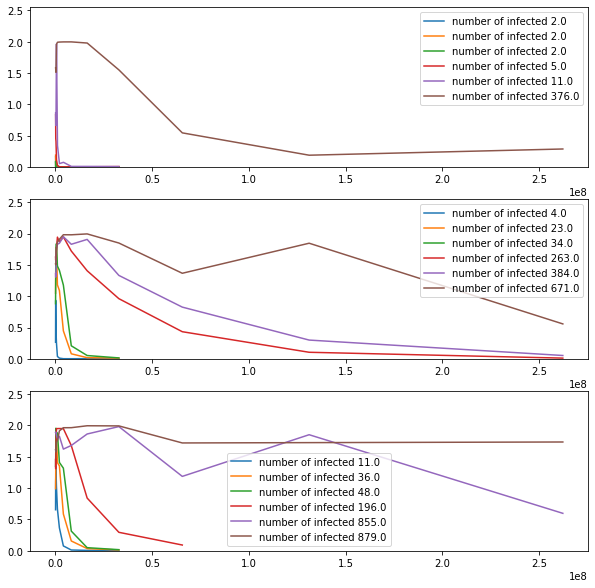

In [24]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(3,1, figsize=(10,10),)
t = 0 #list(range(t_limit))
conver = []
num_plot = 0
for i_seed, seed in enumerate(seeds):

        #plt.subplot(2, 3, cl+1)
    for instance_num in range(num_conf[i_seed]):
        for cl in range(len(lambda_)):
            max_ = 0
            res = []
            x = []
            name = []
            I = 0

            I = ress[seed][lambda_[cl]][instance_num]["sib"]["marginals"][:,-1, 1].sum()
            #norm_I = ress[seed][Ns[cl]][instance_num]["sib"]["marginals"][:,:, 1].sum()
            m_sib = ress[seed][lambda_[cl]][instance_num]["sib"]["marginals"][:,t,1]
            norm_I = m_sib.sum()#I * t_limit
            print(norm_I)
            for i_step, step in enumerate(steps):
                try:
                    str_name_file = str(step)
                    norm_I_temp=ress[seed][lambda_[cl]][instance_num]["regressive"][step]["marginals"][:,t,1].sum()
                    m_nn = ress[seed][lambda_[cl]][instance_num]["regressive"][step]["marginals"][:,t,1]/norm_I_temp
                    diff = np.abs(m_nn - m_sib).sum()
                    #print(f"{str_name_file}, {diff/I}")
                    res.append(diff/(norm_I))
                    name.append(str_name_file)
                    x.append(1000*(1./float(step) + 100))
                except:
                    pass
            if I in conver:
                print("ERROR")
            conver.append({
                "step":x,
                "err":res,
                "N":Ns[cl],
                "I":I
            })

            axs[num_plot].plot(x, res, label=f"number of infected {I}")
            axs[num_plot].legend()
        axs[num_plot].axis(ymin=0,ymax=2.55)
        num_plot += 1

for i, ii in enumerate(conver):
    conver[i]["err"].insert(0,1000)
    conver[i]["step"].insert(0,100*1000)
    #plt.xticks(range(len(res)), name)

#plt.semilogx()
plt.show()

for now avoiding very large point
for now avoiding very large point
for now avoiding very large point
for now avoiding very large point
for now avoiding very large point

fit parameter 1-sigma error
59452.521340132516 +- 9066.738086832669
1.3613573746522194 +- 0.06408288551597154


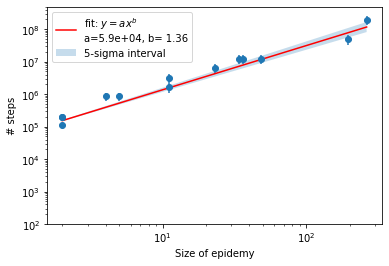

In [25]:
from scipy.optimize import curve_fit
def func(x, a, b):
    return a * x ** b
%matplotlib inline

y_conv = []
x_conv = []
y_err = []
for i, ii in enumerate(conver):
    I = conver[i]["I"]
    if I < 300 and I >1:
        y_i = np.argmax(np.array(conver[i]["err"]) < 0.10)
        y_conv.append((conver[i]["step"][y_i] + conver[i]["step"][y_i-1])/2)
        y_err.append((conver[i]["step"][y_i] - conver[i]["step"][y_i-1])/2)
        #print(i, y_i, y_err[-1], conver[i]["step"][y_i], conver[i]["step"][y_i-1])
        x_conv.append(I)
        #print(I,y_i, y_conv[-1], y_err[-1])
        #print(conver[I]["step"][y_i])
    else:
        print("for now avoiding very large point")
x_conv = np.array(x_conv)
y_conv = np.array(y_conv)
y_err = np.array(y_err)
arr1inds = x_conv.argsort()
x_conv = x_conv[arr1inds]
y_conv = y_conv[arr1inds]
y_err = y_err[arr1inds]

print()
#y_conv *= 1000
#y_err *= 1000

plt.errorbar(x_conv, y_conv, marker="o", yerr=y_err, ls='none')
popt, pcov = curve_fit(func, x_conv, y_conv, p0=(15,0.95), sigma=y_err)
plt.plot(x_conv, func(x_conv, *popt), 'r-',
         label='fit: $y=ax^b$\na=%1.1e, b=%5.2f' % tuple(popt))
popt2, pcov2 = curve_fit(func, x_conv, y_conv, p0=(15,0.95))
#plt.plot(x_conv, func(x_conv, *popt2), 'g-',
#         label='fit: a=%5.3f, b=%5.3f' % tuple(popt2))
perr = np.sqrt(np.diag(pcov))

#print fit parameters and 1-sigma estimates
print('fit parameter 1-sigma error')
for i in range(len(popt)):
    print(str(popt[i])+' +- '+str(perr[i]))
perr[0]=0
# prepare confidence level curves
nstd = 1. # to draw 5-sigma intervals
popt_up = popt + nstd * perr
popt_dw = popt - nstd * perr

fit_up = func(x_conv, *popt_up)
fit_dw = func(x_conv, *popt_dw)
plt.fill_between(x_conv, fit_up, fit_dw, alpha=.25, label='5-sigma interval')

plt.xlabel("Size of epidemy")
plt.ylabel("# steps")
plt.loglog()
#plt.semilogy()
plt.legend()
plt.ylim(1e2, 5e8)
plt.show()


In [26]:
df = pd.DataFrame(data={"x":x_conv, "y":y_conv, "err":y_err})

In [27]:
df.to_csv("img/res_nn.gz")

# SF

In [28]:
ress[seed][Ns[cl]][instance_num]["sm"]

KeyError: 1093

KeyError: 1093

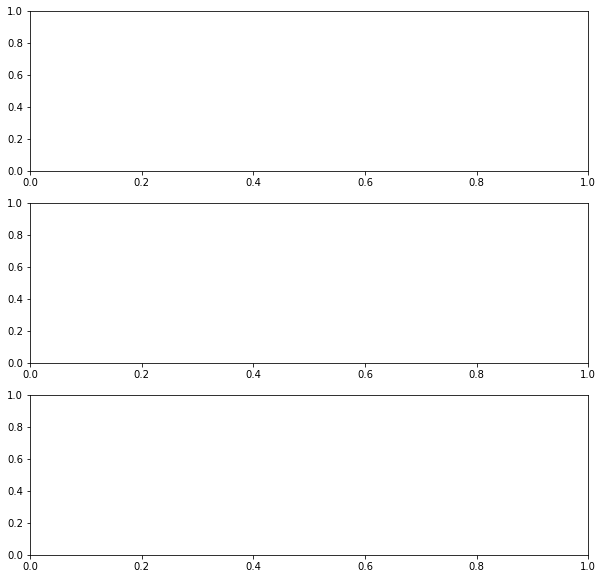

In [29]:
fig, axs = plt.subplots(3,1, figsize=(10,10),)
t = list(range(t_limit))
#plt.ylim((0., 0.005))
conver = []
num_plot = 0
for i_seed, seed in enumerate(seeds):

        #plt.subplot(2, 3, cl+1)
    for instance_num in range(num_conf[i_seed]):
        for cl in range(len(Ns)):
            max_ = 0
            res = []
            x = []
            name = []
            I = 0

            I = ress[seed][Ns[cl]][instance_num]["sib"]["marginals"][:,-1, 1].sum()
            m_sib = ress[seed][Ns[cl]][instance_num]["sib"]["marginals"][:,t,1]
            for i_step, step in enumerate(nsims):
                try:
                    str_name_file = str(step)
                    m_nn = ress[seed][Ns[cl]][instance_num]["sm"][step]["marginals"][:,t,1]
                    diff = np.abs(m_nn - m_sib).sum()
                    #print(f"{str_name_file}, {diff/I}")
                    res.append(diff/(I*t_limit))
                    name.append(str_name_file)
                    x.append(1./step + 100)
                except:
                    print("no")
            if I in conver:
                print("ERROR")
            conver.append({
                "step":x,
                "err":res,
                "N":Ns[cl],
                "I":I
            })

            axs[num_plot].plot(x, res, label=f"number of infected {I}")
            axs[num_plot].legend()
        num_plot += 1
for i, ii in enumerate(conver):
    conver[i]["err"].insert(0,1000)
    conver[i]["step"].insert(0,0)
    #plt.xticks(range(len(res)), name)
#plt.semilogx()

## Marginals

In [30]:
import utils.analysis
from utils.analysis import sort_I
from imp import reload
reload(utils.analysis)
data_.keys()

ModuleNotFoundError: No module named 'utils.analysis'

In [31]:
import matplotlib.pyplot as plt
plt.figure(1, figsize=(10,10),)
t = list(range(t_limit))

for cl in range(len(N)):
    plt.subplot(2, 3, cl+1)
    for instance_num in range(num_conf[cl]):
        m_sib = ress[N[cl]][instance_num]["sib"]["marginals"][:,t,1]
        for i_step, step in enumerate(steps):
            try:
                m_nn = ress[N[cl]][instance_num]["regressive"][step]["marginals"][:,t,1]
                plt.scatter(m_nn, m_sib, marker='.', label= str(step))
            except:
                pass
            plt.title(N[cl])
            plt.legend()

NameError: name 'N' is not defined

<Figure size 720x720 with 0 Axes>

In [32]:
import matplotlib.pyplot as plt
plt.figure(1, figsize=(10,10),)
t = list(range(t_limit))
alpha = 20
for cl in range(len(N)):
    plt.subplot(2, 3, cl+1)
    for instance_num in range(num_conf[cl]):
        m_sib = ress[N[cl]][instance_num]["sib"]["marginals"][:,t,1]
        for i_step, step in enumerate(nsims):
            try:
                m_nn = ress[N[cl]][instance_num]["sf"][step]["marginals"][alpha, t,:,1]
                plt.scatter(m_nn, m_sib, label= str(step))
            except:
                pass
            plt.title(N[cl])
            plt.legend()

NameError: name 'N' is not defined

<Figure size 720x720 with 0 Axes>

In [33]:
import matplotlib.pyplot as plt
plt.figure(1, figsize=(10,10),)
t = 0
for cl in range(len(N)):
    plt.subplot(2, 3, cl+1)
    for instance_num in range(num_conf[cl]):
        m_sib = ress[N[cl]][instance_num]["sib"]["marginals"][:,t,1]
        for i_step, step in enumerate(steps):
            try:
                m_nn = ress[N[cl]][instance_num]["regressive"][step]["marginals"][:,t,1]
                plt.scatter(m_nn, m_sib, label= str(step))
            except:
                pass
            plt.title(N[cl])
            plt.legend()

NameError: name 'N' is not defined

<Figure size 720x720 with 0 Axes>

In [34]:
plt.figure(1, figsize=(10,10),)
t = 0
for cl in range(len(N)):
    plt.subplot(2, 3, cl+1)
    max_ = 0
    res = []
    name = []
    for instance_num in range(num_conf[cl]):
        I = ress[N[cl]][instance_num]["sib"]["marginals"][:,-1, 1].sum()
        m_sib = ress[N[cl]][instance_num]["sib"]["marginals"][:,t,1]
        for i_step, step in enumerate(steps):
            try:
                str_name_file = str(step)
                m_nn = ress[N[cl]][instance_num]["regressive"][step]["marginals"][:,t,1]
                diff = np.abs(m_nn - m_sib).sum()
                print(f"{str_name_file}, {diff/I}, I")
                res.append(diff/I)
                name.append(str_name_file)
            except:
                pass

    plt.bar(range(len(res)), res)
    plt.xticks(range(len(res)), name)
    

NameError: name 'N' is not defined

<Figure size 720x720 with 0 Axes>

In [35]:
plt.figure(1, figsize=(10,10),)
t = 0
alpha=20
for cl in range(len(N)):
    plt.subplot(2, 3, cl+1)
    max_ = 0
    res = []
    name = []
    for instance_num in range(num_conf[cl]):
        I = ress[N[cl]][instance_num]["sib"]["marginals"][:,-1, 1].sum()
        m_sib = ress[N[cl]][instance_num]["sib"]["marginals"][:,t,1]
        for i_nsim, nsim in enumerate(nsims):
            #try:
                str_name_file = str(nsims)
                m_nn = ress[N[cl]][instance_num]["sf"][nsim]["marginals"][alpha, t,:,1]
                diff = np.abs(m_nn - m_sib).sum()
                print(f"{str_name_file}, {diff/I}, I")
                res.append(diff/I)
                name.append(str_name_file)
            #except:
            #    pass

    plt.bar(range(len(res)), res)
    plt.xticks(range(len(res)), name)
    

NameError: name 'N' is not defined

<Figure size 720x720 with 0 Axes>

NameError: name 'N' is not defined

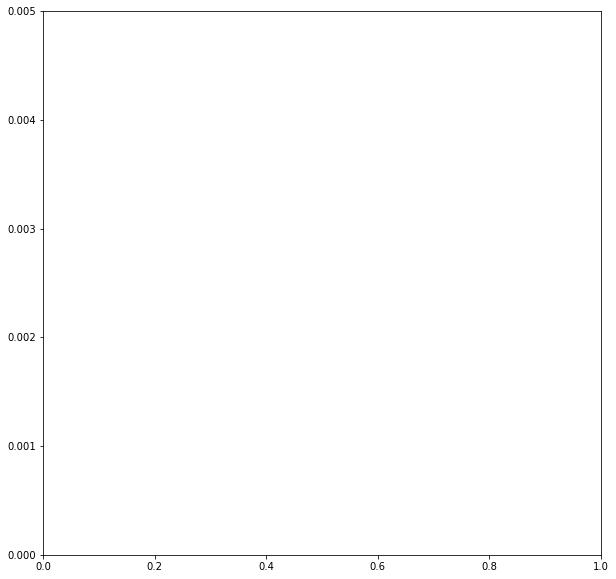

In [36]:
plt.figure(1, figsize=(10,10),)
t = 0
plt.ylim((0., 0.005))
conver = {}

for cl in range(len(N)):

    #plt.subplot(2, 3, cl+1)
    for instance_num in range(num_conf[cl]):
        max_ = 0
        res = []
        x = []
        name = []
        I = 0

        I = ress[N[cl]][instance_num]["sib"]["marginals"][:,-1, 1].sum()
        m_sib = ress[N[cl]][instance_num]["sib"]["marginals"][:,t,1]
        for i_step, step in enumerate(steps):
            try:
                str_name_file = str(step)
                m_nn = ress[N[cl]][instance_num]["regressive"][step]["marginals"][:,t,1]
                diff = np.abs(m_nn - m_sib).sum()
                print(f"{str_name_file}, {diff/I}")
                res.append(diff/I)
                name.append(str_name_file)
                x.append(1./step)
            except:
                pass
        conver[I] = {
            "step":x,
            "err":res,
            "N":N[cl]
        }

        plt.plot(x, res, label=f"number of infected {I}")
        plt.legend()
    #plt.xticks(range(len(res)), name)
#plt.semilogx()

Text(0, 0.5, '# steps')

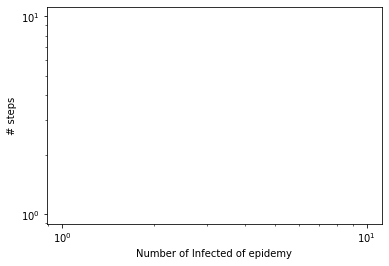

In [37]:
y_conv = []
x_conv = []
for I in conver:
    y_i = np.argmax(np.array(conver[I]["err"]) < 0.002)
    y_conv.append(conver[I]["step"][y_i])
    x_conv.append(I)
    print(I, y_i)
    
#y_conv[-1]=15000
plt.plot(x_conv, y_conv, "o")
plt.xlabel("Number of Infected of epidemy")

plt.loglog()
plt.ylabel("# steps")

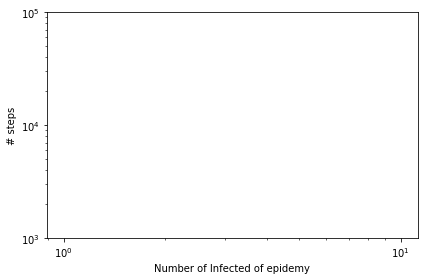

In [38]:
y_conv = []
x_conv = []
y_err = []
for I in conver:
    y_i = np.argmax(np.array(conver[I]["err"]) < 0.001)
    y_conv.append((conver[I]["step"][y_i] + conver[I]["step"][y_i-1]/2))
    y_err.append((conver[I]["step"][y_i] - conver[I]["step"][y_i-1]))
    print(y_err)
    x_conv.append(I)
    print(I, y_i)
    
#y_conv[-2]=20000
plt.errorbar(x_conv, y_conv, marker="o", yerr=y_err, ls='none')
plt.xlabel("Number of Infected of epidemy")
plt.loglog()
plt.ylabel("# steps")
plt.ylim(1e3, 1e5)
plt.tight_layout()

In [39]:
plt.figure(1, figsize=(10,10),)
t = 0
for cl in range(len(N)):
    plt.subplot(2, 3, cl+1)
    max_ = 0
    res = []
    name = []
    for i_step, step in enumerate(steps):
        for instance_num in range(num_conf[cl]):
            str_name_file = str(step)
            I = ress[N[cl]][step][instance_num]["sib"]["marginals"][:,-1, 1].sum()
            m_nn = ress[N[cl]][step][instance_num]["regressive"]["marginals"][:,t,1]
            m_sib = ress[N[cl]][step][instance_num]["sib"]["marginals"][:,t,1]
            diff = np.abs(m_nn - m_sib).sum() / I
            print(f"{str_name_file}, {n_v}, {i}, {diff}")
            res.append(diff)
            name.append(str_name_file)
    plt.bar(range(len(res)), res)
    plt.xticks(range(len(res)), name)
    

NameError: name 'N' is not defined

<Figure size 720x720 with 0 Axes>

In [40]:
(x[:,:,0] == 0).shape

TypeError: list indices must be integers or slices, not tuple

In [41]:
(x[:,:,0] == 0).sum(dim=1)

TypeError: list indices must be integers or slices, not tuple

In [42]:
x[:,:,0] == 0

TypeError: list indices must be integers or slices, not tuple